In [307]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tabulate 
from tabulate import tabulate
import seaborn as sns
from apyori import apriori
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters



In [305]:
data = pd.read_csv('data.csv', sep = ',', encoding = 'Latin-1')
type(data)

pandas.core.frame.DataFrame

###Data Exploration 

At this stage, I am not preprocessing the data since there no null values nor I need to convert categories into numerics to run any sort of analytics. In Data Exploration, some important insights are will be extracted. 

#### 1. Regional Insights 


 Customer Name       |   Count
---------------------+---------
 Muhammed Yedwab     |     108
 Steven Ward         |     106
 Gary Hwang          |     102
 Patrick O'Brill     |     102
 Bill Eplett         |     102
 Harry Greene        |     101
 Eric Murdock        |     100
 Art Ferguson        |      98
 Brosina Hoffman     |      97
 Bart Watters        |      96
 Chloris Kastensmidt |      96
 John Grady          |      95
 Natalie Fritzler    |      95
 Darrin Van Huff     |      94
 Eugene Moren        |      94
 Michael Paige       |      94
 Tom Boeckenhauer    |      93
 Karl Braun          |      93
 Noel Staavos        |      92
 Paul Gonzalez       |      92


<Figure size 864x432 with 0 Axes>

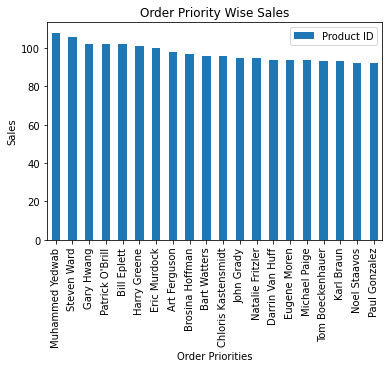

In [7]:
top_customer = data[['Customer Name', 'Product ID']].groupby('Customer Name').count()
top_customer1 = top_customer.sort_values(by = 'Product ID', ascending = False )[:20]
top_customer2 = tabulate(top_customer1, tablefmt="presto", headers = ['Customer Name', 'Count'])
print(top_customer2)
plt.figure(figsize= (12,6))
top_customer1.plot.bar()
plt.title('Order Priority Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Order Priorities')
plt.show()



 Product ID       |   Count
------------------+---------
 OFF-AR-10003651  |      35
 OFF-AR-10003829  |      31
 OFF-BI-10002799  |      30
 OFF-BI-10003708  |      30
 FUR-CH-10003354  |      28
 OFF-BI-10002570  |      27
 OFF-BI-10004140  |      25
 OFF-BI-10004195  |      24
 OFF-BI-10003650  |      24
 OFF-BI-10004632  |      24
 OFF-BI-10001808  |      24
 OFF-BI-10000542  |      23
 OFF-BIN-10002061 |      23
 OFF-AR-10000091  |      23
 OFF-BI-10004654  |      22
 OFF-AR-10004825  |      22
 OFF-BI-10001249  |      22
 OFF-AR-10000110  |      22
 OFF-STA-10001791 |      22
 OFF-STA-10001747 |      21


<Figure size 864x432 with 0 Axes>

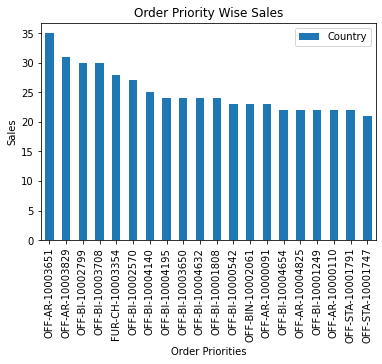

In [8]:
top_product = data[['Product ID', 'Country']].groupby('Product ID').count()
top_product1 = top_product.sort_values(by = 'Country', ascending = False )[:20]
top_product2 = tabulate(top_product1, tablefmt="presto", headers = ['Product ID', 'Count'])
print(top_product2)
plt.figure(figsize= (12,6))
top_product1.plot.bar()
plt.title('Order Priority Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Order Priorities')
plt.show()



 Country            |   Count
--------------------+---------
 United States      |    9994
 Australia          |    2837
 France             |    2827
 Mexico             |    2644
 Germany            |    2065
 China              |    1880
 United Kingdom     |    1633
 Brazil             |    1599
 India              |    1555
 Indonesia          |    1390
 Turkey             |    1378
 Italy              |    1108
 Nigeria            |     905
 Spain              |     859
 Dominican Republic |     742
 El Salvador        |     736
 Cuba               |     724
 Honduras           |     713
 Philippines        |     681
 New Zealand        |     628


<Figure size 1152x576 with 0 Axes>

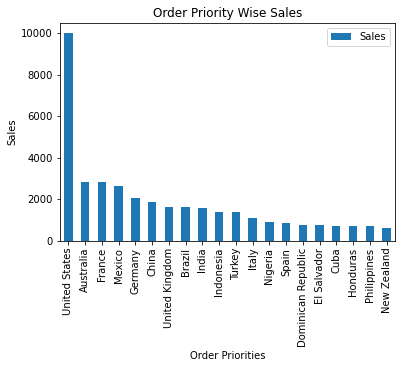

In [9]:
product_country = data[[ 'Country', 'Sales']].groupby(['Country']).count()
top_buyer = product_country.sort_values(by = 'Sales', ascending=False)[:20]
top_buyer1 = tabulate(top_buyer, tablefmt="presto", headers = ['Country', 'Count'])
print(top_buyer1)
plt.figure(figsize=(16,8))
top_buyer.plot.bar()
plt.title('Order Priority Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Order Priorities')
plt.show()

City
Aachen           3803.151
Aalen             979.695
Aalst             387.330
Aba              1064.124
Abadan           1354.950
Abakaliki          34.326
Abbeville         217.830
Abbotsford        295.740
Abeokuta          106.758
Aberdeen         1573.350
Abha             1603.500
Abidjan         16191.720
Abilene             1.392
Abreu e Lima      928.256
Abu Kabir         486.540
Name: Sales, dtype: float64


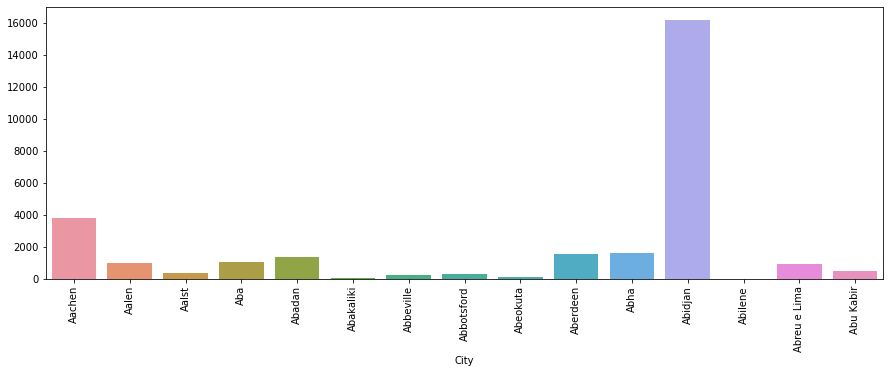

In [252]:
City = data.groupby('City').sum()['Sales'][:15]
print(City)

plt.figure(figsize=(15,5))
sns.barplot(x=City.index, y=City.values)
plt.xticks(rotation=90)

plt.show()

In [11]:
product_info = data [['Product ID', 'Quantity', 'Sales', 'Profit']].groupby('Product ID')['Quantity', 'Sales', 'Profit'].sum()[:20]
product_info1 = tabulate(product_info, headers = ['Product ID', 'Quantity', 'Sales', 'Profit'],  tablefmt="presto")
print(product_info1)

 Product ID       |   Quantity |    Sales |   Profit
------------------+------------+----------+----------
 FUR-ADV-10000002 |          3 |  159.12  |   60.39
 FUR-ADV-10000108 |          7 |  350.07  |    3.36
 FUR-ADV-10000183 |         31 |  974.832 | -651.738
 FUR-ADV-10000188 |          7 |  124.95  |    4.2
 FUR-ADV-10000190 |          2 |  222.36  |  104.46
 FUR-ADV-10000571 |         20 | 2194.8   |  702
 FUR-ADV-10000600 |          4 |  205.8   |   24.6
 FUR-ADV-10000847 |         11 |  290.73  |   81.18
 FUR-ADV-10001283 |          3 |  177.792 |  -88.968
 FUR-ADV-10001440 |         22 |  959.139 |  176.379
 FUR-ADV-10001659 |         10 |  147.06  |   16.86
 FUR-ADV-10001855 |          4 |   89.658 |   12.618
 FUR-ADV-10002329 |          1 |    7.476 |   -9.534
 FUR-ADV-10002601 |         11 |  495.36  |  200.01
 FUR-ADV-10002632 |          2 |   36.072 |  -48.708
 FUR-ADV-10002889 |         19 |  803.772 |  -61.488
 FUR-ADV-10003147 |          8 |  187.2   |   57.84
 FUR-AD

<ipython-input-11-8f3df988ee36>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_info = data [['Product ID', 'Quantity', 'Sales', 'Profit']].groupby('Product ID')['Quantity', 'Sales', 'Profit'].sum()[:20]


In [34]:
association = data[['Order Date', 'Product ID']]
association1 = association.groupby('Order Date')['Product ID'].apply(list) 
association1 = pd.DataFrame(association1).reset_index()
association1.columns  = ['Order Date', 'Products']
assoc = association1['Products']

#assoc2 = assoc.to_frame()
#df = assoc2['Products'].apply(lambda x: ', '.join([str(i) for i in x]))
#df1 = df.to_frame()
#df1.set_index('Products')
#df1.explode('Products')

#print(type(assoc2))
#assoc1 =Assoc.values.tolist()
#print(assoc1)
df_apr = assoc.apply(pd.Series)
df_apr =df_apr[:1000]
print(df_apr)
transactions = []
for i in range(0, 1000):
  transactions.append([str(df_apr.values[i,j]) for j in range(0, 135)])
print(transactions)



                  0                1                 2                 3    \
0    OFF-TEN-10000025  OFF-SU-10000618  OFF-TEN-10001585   OFF-PA-10001492   
1     TEC-CO-10002379  FUR-BO-10003549   TEC-AC-10001500   FUR-BO-10004541   
2     TEC-MA-10001777  TEC-MA-10002134   TEC-PH-10002586   OFF-ST-10002554   
3    TEC-SAN-10003238  TEC-CO-10001177  OFF-IBI-10000959  OFF-ELD-10000967   
4     FUR-TA-10001786  TEC-CO-10000967   TEC-CO-10000953   TEC-PH-10001817   
..                ...              ...               ...               ...   
995   FUR-TA-10001930  TEC-PH-10002624   OFF-AR-10003957   TEC-CO-10002466   
996   FUR-CH-10000953  OFF-ST-10004976   FUR-CH-10000863   TEC-MA-10001139   
997   TEC-PH-10004664  TEC-CO-10002617   OFF-ST-10004837   FUR-CH-10002573   
998   TEC-CO-10003496  OFF-AP-10001593   FUR-TA-10004524   FUR-CH-10000025   
999  FUR-BUS-10001243  TEC-AC-10000053   TEC-PH-10000922   OFF-SU-10003343   

                  4                 5                 6        

In [36]:
 


rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [37]:
results = list(rules)

In [38]:
results

[RelationRecord(items=frozenset({'FUR-ADV-10000183', 'OFF-BI-10003708'}), support=0.003, ordered_statistics=[OrderedStatistic(items_base=frozenset({'FUR-ADV-10000183'}), items_add=frozenset({'OFF-BI-10003708'}), confidence=0.375, lift=19.736842105263158)]),
 RelationRecord(items=frozenset({'OFF-STI-10000144', 'FUR-BO-10000210'}), support=0.003, ordered_statistics=[OrderedStatistic(items_base=frozenset({'FUR-BO-10000210'}), items_add=frozenset({'OFF-STI-10000144'}), confidence=0.42857142857142855, lift=61.224489795918366), OrderedStatistic(items_base=frozenset({'OFF-STI-10000144'}), items_add=frozenset({'FUR-BO-10000210'}), confidence=0.42857142857142855, lift=61.224489795918366)]),
 RelationRecord(items=frozenset({'FUR-BO-10000728', 'OFF-AR-10001812'}), support=0.003, ordered_statistics=[OrderedStatistic(items_base=frozenset({'FUR-BO-10000728'}), items_add=frozenset({'OFF-AR-10001812'}), confidence=0.33333333333333337, lift=47.61904761904762), OrderedStatistic(items_base=frozenset({'OF

In [39]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [40]:
resultsinDataFrame


Left Hand Side   Right Hand Side  Support  Confidence        Lift
0    FUR-ADV-10000183   OFF-BI-10003708    0.003    0.375000   19.736842
1     FUR-BO-10000210  OFF-STI-10000144    0.003    0.428571   61.224490
2     FUR-BO-10000728   OFF-AR-10001812    0.003    0.333333   47.619048
3     FUR-BO-10000746   FUR-CH-10003354    0.003    1.000000   47.619048
4     FUR-BO-10001934  OFF-GRE-10004796    0.003    0.333333   66.666667
..                ...               ...      ...         ...         ...
205   TEC-AC-10001221   TEC-CO-10003931    0.003    0.428571   35.714286
206   TEC-AC-10002257   TEC-AC-10003327    0.003    0.428571   85.714286
207   TEC-AC-10004510   TEC-CO-10003448    0.003    0.428571   61.224490
208  TEC-ENE-10000995   TEC-PH-10003877    0.003    1.000000  166.666667
209   TEC-PH-10001619   TEC-PH-10002564    0.003    0.500000   38.461538

[210 rows x 5 columns]

In [41]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

Left Hand Side   Right Hand Side  Support  Confidence        Lift
208  TEC-ENE-10000995   TEC-PH-10003877    0.003    1.000000  166.666667
20    FUR-CH-10002093   OFF-ST-10000880    0.003    0.750000  150.000000
94    OFF-AR-10004999   OFF-BI-10002160    0.003    0.500000  125.000000
181   OFF-LA-10002630   TEC-PH-10000526    0.003    0.750000  125.000000
70    OFF-AR-10001462   OFF-LA-10000404    0.003    0.333333  111.111111
124   OFF-BI-10001967  OFF-BIN-10000308    0.003    0.750000  107.142857
133   OFF-BI-10003309   OFF-SU-10004306    0.003    0.750000  107.142857
199   OFF-ST-10003089   TEC-AC-10004334    0.003    0.750000  107.142857
202   OFF-SU-10001573  TEC-KON-10002052    0.003    0.428571  107.142857
55    OFF-AP-10000904   OFF-BI-10002764    0.003    0.600000  100.000000

In [306]:
product_country = data [['Country','Category', 'Quantity']].groupby(['Country','Category'] )['Quantity'].sum(min_count = 1)
product_country1 = product_country.sort_values( ascending = False)
product_country1.unstack()

Category     Furniture  Office Supplies  Technology
Country                                            
Afghanistan       43.0            133.0        52.0
Albania            3.0             21.0        16.0
Algeria           45.0            333.0        76.0
Angola            46.0            221.0        50.0
Argentina        348.0            865.0       291.0
...                ...              ...         ...
Venezuela        130.0            536.0       108.0
Vietnam          229.0            526.0       241.0
Yemen              6.0             46.0        19.0
Zambia            53.0            160.0        38.0
Zimbabwe          22.0            144.0        24.0

[147 rows x 3 columns]

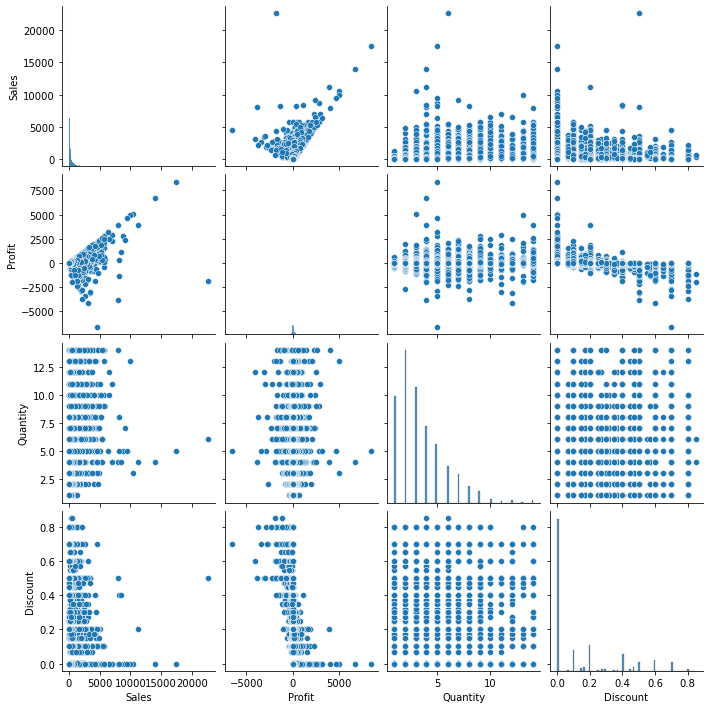

In [232]:
sns.pairplot(data[['Sales', 'Profit', 'Quantity', 'Discount']])

In [237]:
Supplier_country = data[['Category', 'Quantity']].groupby('Category').count()
Supplier_country1 = tabulate(Supplier_country, tablefmt="presto", headers = ['Category', 'Count'])
print(Supplier_country1)
fig = px.pie(Supplier_country, values='Quantity', names=['Furniture', 'Office Supplies', 'Technology'], color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

 Category        |   Count
-----------------+---------
 Furniture       |    9876
 Office Supplies |   31273
 Technology      |   10141


C:\Users\yasir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


 Country     |     Sales |    Profit
-------------+-----------+-----------
 Afghanistan |  21673.3  |   5460.3
 Albania     |   3888.12 |    709.32
 Algeria     |  36091.6  |   9106.5
 Angola      |  25554    |   6494.97
 Argentina   |  57511.8  | -18693.8
 Armenia     |    156.75 |     69.09
 Australia   | 925236    | 103907
 Austria     |  92539.1  |  24341.7
 Azerbaijan  |   5631.51 |   1831.05
 Bahrain     |    669.18 |     12.84
 Bangladesh  |  78256.5  |  19430.9
 Barbados    |   7174.27 |   2199.79
 Belarus     |  13386.1  |   4534.26
 Belgium     |  49226.7  |  11572.6
 Benin       |   6212.07 |   1349.19


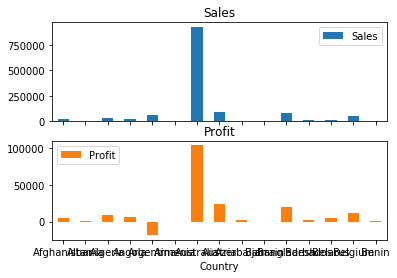

In [12]:

country = data[['Country', 'Sales', 'Profit']]
pro1 = country.groupby('Country')['Sales', 'Profit'].sum()
top_pro1 = pro1.sort_values(by = 'Country', ascending = True )[:15]
print(tabulate(top_pro1, headers=["Country", "Sales","Profit"], tablefmt="presto"))

#country = data.groupby(["Country", "Sales","Profit"])['Country']
#country_sorted = country.sort_values(by="Sales",ascending=False)[:10]
#country_sorted
axes = top_pro1.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2) 




In [13]:
customer_country = data[['Segment', 'Product ID', 'Region', 'Category', 'Quantity']]
customer_country1 = customer_country.groupby([ 'Region', 'Category']).count()
customer_country2 = tabulate(customer_country1, headers = ['Region-Category', 'Unit'],tablefmt="presto")
#print(type(customer_country2))
print(customer_country2)



                                       |      |   Region-Category |   Unit
---------------------------------------+------+-------------------+--------
 ('Africa', 'Furniture')               |  631 |               631 |    631
 ('Africa', 'Office Supplies')         | 3045 |              3045 |   3045
 ('Africa', 'Technology')              |  911 |               911 |    911
 ('Canada', 'Furniture')               |   42 |                42 |     42
 ('Canada', 'Office Supplies')         |  277 |               277 |    277
 ('Canada', 'Technology')              |   65 |                65 |     65
 ('Caribbean', 'Furniture')            |  376 |               376 |    376
 ('Caribbean', 'Office Supplies')      |  973 |               973 |    973
 ('Caribbean', 'Technology')           |  341 |               341 |    341
 ('Central', 'Furniture')              | 2046 |              2046 |   2046
 ('Central', 'Office Supplies')        | 6936 |              6936 |   6936
 ('Central', 'Technology

In [14]:

country_sales = data[['Sales','Profit', 'Region', 'Category']]
country_sales1 = country_sales.groupby([ 'Region', 'Category']).sum()
country_sales2 = tabulate(country_sales1, headers = ['Region-Category', 'Sales', 'profit'],tablefmt="presto")
print(country_sales2 )


fig = px.sunburst(data,path=['Region', 'Segment', 'Category'],
                 values='Sales',color='Segment',
                 hover_data =['Sales'])
fig.update_layout(height=1000,title_text='Sales, Product Categories & Sub-Categories')
fig.show()


 Region-Category                       |            Sales |    profit
---------------------------------------+------------------+-----------
 ('Africa', 'Furniture')               | 194651           |  16262.1
 ('Africa', 'Office Supplies')         | 266756           |  28480.1
 ('Africa', 'Technology')              | 322367           |  44129.5
 ('Canada', 'Furniture')               |  10595.3         |   2613.24
 ('Canada', 'Office Supplies')         |  30034.1         |   7957.53
 ('Canada', 'Technology')              |  26298.8         |   7246.62
 ('Caribbean', 'Furniture')            | 118372           |   6223.46
 ('Caribbean', 'Office Supplies')      |  89575.4         |  14818.3
 ('Caribbean', 'Technology')           | 116333           |  13529.6
 ('Central', 'Furniture')              | 860418           |  54550.8
 ('Central', 'Office Supplies')        | 923435           | 121315
 ('Central', 'Technology')             |      1.03845e+06 | 135538
 ('Central Asia', 'Furniture') 

In [15]:
temp = data[['Country','State','Sales']].groupby(['Country','State'])['Sales'].sum().reset_index()
fig = px.treemap(temp,path=['Country','State'], values='Sales')

fig.update_layout(height=1000,title='States-Sales',)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [16]:
temp = data[['Category','Sub-Category','Sales', 'Profit']].groupby(['Category','Sub-Category'])['Sales', 'Profit'].sum().reset_index()
fig = px.treemap(temp,path=['Category','Sub-Category'], values='Sales')

fig.update_layout(height=1000,title='Category_Sub-CVategory Sales',)
fig.data[0].textinfo = 'label+text+value'
fig.show()

C:\Users\yasir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [245]:
Segment_data = data[['Segment', 'Sales', 'Quantity', 'Profit']].groupby('Segment')['Sales', 'Quantity', 'Profit'].sum()
Segment_data[['Sales','Quantity','Profit']].style\
        .background_gradient(cmap='Greens',subset=['Sales'])\
.background_gradient(cmap='Blues',subset=['Quantity'])\
.background_gradient(cmap='Greys',subset=['Profit'])

<ipython-input-245-f5bf99c01e5e>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Market', ylabel='count'>

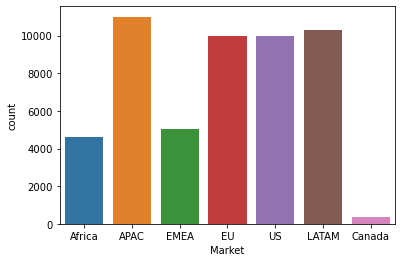

In [246]:
sns.countplot("Market",data=data)

                    Quantity
Country                     
United States          37873
France                 10804
Australia              10673
Mexico                 10011
Germany                 7745
China                   7081
United Kingdom          6161
Brazil                  6148
India                   5758
Indonesia               5237
Italy                   4126
Spain                   3240
Turkey                  3024
Dominican Republic      2736
El Salvador             2734
Cuba                    2717
Philippines             2606
Honduras                2556
Nicaragua               2235
New Zealand             2089


<Figure size 864x432 with 0 Axes>

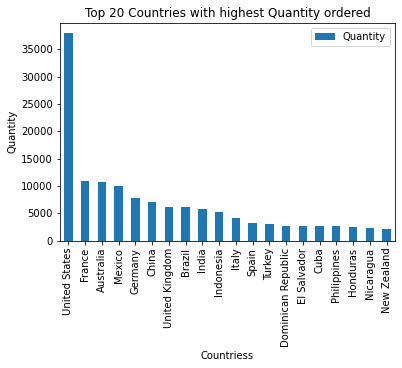

In [303]:
Quant_Ctry = data[['Country', 'Quantity']].groupby('Country').sum()
Quant_Ctry1 = Quant_Ctry.sort_values(by ='Quantity', ascending = False)[:20]
print(Quant_Ctry1)

plt.figure(figsize= (12,6))
Quant_Ctry1.plot.bar()
plt.title('Top 20 Countries with highest Quantity ordered')
plt.ylabel('Quantity')
plt.xlabel('Countriess')
plt.show()


In [267]:
sale_details = pd.DataFrame([{'products': len(data['Product ID'].value_counts()),    
               'transactions': len(data['Order ID'].value_counts()),
               'customers': len(data['Customer ID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], 
              index = ['quantity'])
print(sale_details)


          products  transactions  customers
quantity     10292         25035       1590


In [268]:
clustering_data = data[["Sales", "Profit", "Quantity"]]
clustering_data1 = clustering_data.round(decimals = 0).abs()
clustering_data1


Sales  Profit  Quantity
0      408.0   106.0       2.0
1      120.0    36.0       3.0
2       66.0    30.0       4.0
3       45.0    26.0       3.0
4      114.0    38.0       5.0
...      ...     ...       ...
51285   14.0     5.0       2.0
51286    4.0     0.0       1.0
51287   26.0    12.0       3.0
51288    7.0     1.0       1.0
51289    3.0     1.0       3.0

[51290 rows x 3 columns]

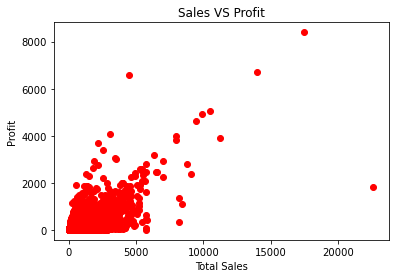

In [269]:
plt.scatter(clustering_data1['Sales'], clustering_data1['Profit'], color = 'red')

plt.title('Sales VS Profit')
plt.xlabel('Total Sales')
plt.ylabel('Profit')
plt.show()

In [270]:

X = clustering_data1.iloc[:, :].values
X

array([[408., 106.,   2.],
       [120.,  36.,   3.],
       [ 66.,  30.,   4.],
       ...,
       [ 26.,  12.,   3.],
       [  7.,   1.,   1.],
       [  3.,   1.,   3.]])

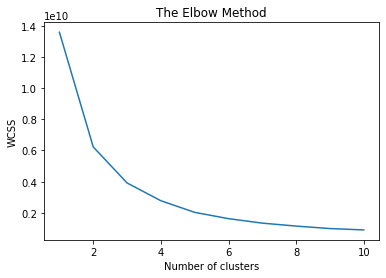

In [271]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [272]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans


array([0, 0, 0, ..., 0, 0, 0])

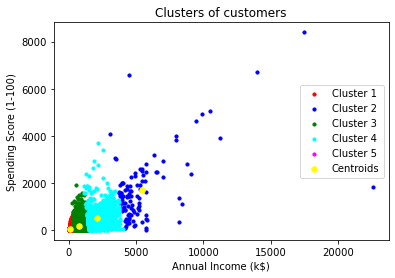

In [273]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [287]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])
data['Year'] = data["Order Date"].dt.year
data['Month'] = data['Order Date'].values.astype('datetime64[M]')
data['Days'] = data['Order Date'].astype('datetime64[ns]')
data


Row ID         Order ID Order Date  Ship Date       Ship Mode  \
0       42433     AG-2011-2040 2011-01-01 2011-06-01  Standard Class   
1       22253    IN-2011-47883 2011-01-01 2011-08-01  Standard Class   
2       48883     HU-2011-1220 2011-01-01 2011-05-01    Second Class   
3       11731  IT-2011-3647632 2011-01-01 2011-05-01    Second Class   
4       22255    IN-2011-47883 2011-01-01 2011-08-01  Standard Class   
...       ...              ...        ...        ...             ...   
51285   32593   CA-2014-115427 2014-12-31 2015-04-01  Standard Class   
51286   47594     MO-2014-2560 2014-12-31 2015-05-01  Standard Class   
51287    8857   MX-2014-110527 2014-12-31 2015-02-01    Second Class   
51288    6852   MX-2014-114783 2014-12-31 2015-06-01  Standard Class   
51289   36388   CA-2014-156720 2014-12-31 2015-04-01  Standard Class   

      Customer ID     Customer Name      Segment         City  \
0        TB-11280   Toby Braunhardt     Consumer  Constantine   
1        JH-15985       Joseph Holt     Consumer  Wagga Wagga   
2          AT-735     Annie Thurman     Consumer     Budapest   
3        EM-14140      Eugene Moren  Home Office    Stockholm   
4        JH-15985       Joseph Holt     Consumer  Wagga Wagga   
...           ...               ...          ...          ...   
51285    EB-13975        Erica Bern    Corporate    Fairfield   
51286     LP-7095         Liz Preis     Consumer       Agadir   
51287    CM-12190  Charlotte Melton     Consumer      Managua   
51288    TD-20995     Tamara Dahlen     Consumer       Juárez   
51289    JM-15580     Jill Matthias     Consumer     Loveland   

                  State  ...                                     Product Name  \
0           Constantine  ...                              Tenex Lockers, Blue   
1       New South Wales  ...                         Acme Trimmer, High Speed   
2              Budapest  ...                          Tenex Box, Single Width   
3             Stockholm  ...                      Enermax Note Cards, Premium   
4       New South Wales  ...                       Eldon Light Bulb, Duo Pack   
...                 ...  ...                                              ...   
51285        California  ...  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   
51286  Souss-Massa-Draâ  ...          Wilson Jones Hole Reinforcements, Clear   
51287           Managua  ...           Hon Color Coded Labels, 5000 Label Set   
51288         Chihuahua  ...           Hon Legal Exhibit Labels, Alphabetical   
51289          Colorado  ...                              Bagged Rubber Bands   

         Sales Quantity Discount    Profit Shipping Cost Order Priority  Year  \
0      408.300        2      0.0  106.1400         35.46         Medium  2011   
1      120.366        3      0.1   36.0360          9.72         Medium  2011   
2       66.120        4      0.0   29.6400          8.17           High  2011   
3       44.865        3      0.5  -26.0550          4.82           High  2011   
4      113.670        5      0.1   37.7700          4.70         Medium  2011   
...        ...      ...      ...       ...           ...            ...   ...   
51285   13.904        2      0.2    4.5188          0.89         Medium  2014   
51286    3.990        1      0.0    0.4200          0.49         Medium  2014   
51287   26.400        3      0.0   12.3600          0.35         Medium  2014   
51288    7.120        1      0.0    0.5600          0.20         Medium  2014   
51289    3.024        3      0.2   -0.6048          0.17         Medium  2014   

           Month       Days  
0     2011-01-01 2011-01-01  
1     2011-01-01 2011-01-01  
2     2011-01-01 2011-01-01  
3     2011-01-01 2011-01-01  
4     2011-01-01 2011-01-01  
...          ...        ...  
51285 2014-12-01 2014-12-31  
51286 2014-12-01 2014-12-31  
51287 2014-12-01 2014-12-31  
51288 2014-12-01 2014-12-31  
51289 2014-12-01 2014-12-31  

[51290 rows x 27 columns]

In [288]:
data2=data[['Order Date','Sales','Profit','Year','Month','Days']]
data2

Order Date    Sales    Profit  Year      Month       Days
0     2011-01-01  408.300  106.1400  2011 2011-01-01 2011-01-01
1     2011-01-01  120.366   36.0360  2011 2011-01-01 2011-01-01
2     2011-01-01   66.120   29.6400  2011 2011-01-01 2011-01-01
3     2011-01-01   44.865  -26.0550  2011 2011-01-01 2011-01-01
4     2011-01-01  113.670   37.7700  2011 2011-01-01 2011-01-01
...          ...      ...       ...   ...        ...        ...
51285 2014-12-31   13.904    4.5188  2014 2014-12-01 2014-12-31
51286 2014-12-31    3.990    0.4200  2014 2014-12-01 2014-12-31
51287 2014-12-31   26.400   12.3600  2014 2014-12-01 2014-12-31
51288 2014-12-31    7.120    0.5600  2014 2014-12-01 2014-12-31
51289 2014-12-31    3.024   -0.6048  2014 2014-12-01 2014-12-31

[51290 rows x 6 columns]

In [105]:
data2.groupby('Year')['Days'].value_counts()

Year  Days      
2011  2011-01-11    76
      2011-08-09    76
      2011-12-20    73
      2011-08-12    67
      2011-11-28    64
                    ..
2014  2014-05-18     2
      2014-12-01     2
      2014-01-19     1
      2014-03-23     1
      2014-09-02     1
Name: Days, Length: 1430, dtype: int64

In [106]:
sales_data=data2.groupby(['Year','Days']).sum()
sales_data

Sales      Profit
Year Days                               
2011 2011-01-01    808.56300   198.87300
     2011-01-02   2455.67000   603.47360
     2011-01-03  12565.76630  1905.15390
     2011-01-04   2582.80100  -308.78740
     2011-01-06  11480.49270  2460.25360
...                      ...         ...
2014 2014-12-27  13421.26376  -916.64004
     2014-12-28   1647.17400    81.06380
     2014-12-29  25109.28878  2046.20678
     2014-12-30  16831.61480  2554.00460
     2014-12-31  13257.95430  1020.17080

[1430 rows x 2 columns]

In [182]:
s = sales_data.reset_index(drop=True)



0         808.56300
1        2455.67000
2       12565.76630
3        2582.80100
4       11480.49270
           ...     
1425    13421.26376
1426     1647.17400
1427    25109.28878
1428    16831.61480
1429    13257.95430
Name: Sales, Length: 1430, dtype: float64


In [185]:
X = s.iloc[:, :-1].values
y = s.iloc[:, -1].values

[[  808.563  ]
 [ 2455.67   ]
 [12565.7663 ]
 ...
 [25109.28878]
 [16831.6148 ]
 [13257.9543 ]]
[ 198.873    603.4736  1905.1539  ... 2046.20678 2554.0046  1020.1708 ]


In [188]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

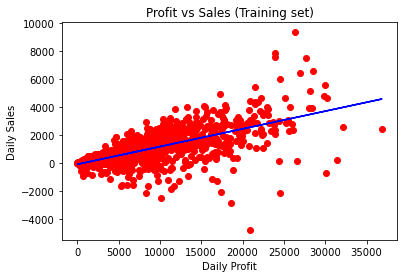

In [192]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Profit vs Sales (Training set)')
plt.xlabel('Daily Profit')
plt.ylabel('Daily Sales')
plt.show()

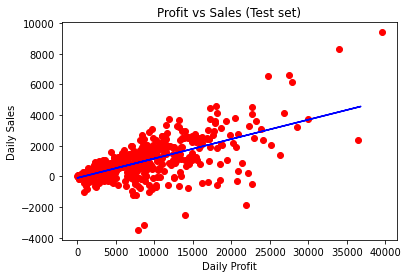

In [193]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Profit vs Sales (Test set)')
plt.xlabel('Daily Profit')
plt.ylabel('Daily Sales')
plt.show()

In [303]:
data3 = data2[['Days', 'Profit']].groupby('Days')['Profit'].sum()
data3

Days
2011-01-01     198.87300
2011-01-02     603.47360
2011-01-03    1905.15390
2011-01-04    -308.78740
2011-01-06    2460.25360
                 ...    
2014-12-27    -916.64004
2014-12-28      81.06380
2014-12-29    2046.20678
2014-12-30    2554.00460
2014-12-31    1020.17080
Name: Profit, Length: 1430, dtype: float64

In [107]:
data2=data[['Order Date','Sales','Profit','Year','Month','Days']]
print(data2)


      Order Date    Sales    Profit  Year      Month       Days
0     2011-01-01  408.300  106.1400  2011 2011-01-01 2011-01-01
1     2011-01-01  120.366   36.0360  2011 2011-01-01 2011-01-01
2     2011-01-01   66.120   29.6400  2011 2011-01-01 2011-01-01
3     2011-01-01   44.865  -26.0550  2011 2011-01-01 2011-01-01
4     2011-01-01  113.670   37.7700  2011 2011-01-01 2011-01-01
...          ...      ...       ...   ...        ...        ...
51285 2014-12-31   13.904    4.5188  2014 2014-12-01 2014-12-31
51286 2014-12-31    3.990    0.4200  2014 2014-12-01 2014-12-31
51287 2014-12-31   26.400   12.3600  2014 2014-12-01 2014-12-31
51288 2014-12-31    7.120    0.5600  2014 2014-12-01 2014-12-31
51289 2014-12-31    3.024   -0.6048  2014 2014-12-01 2014-12-31

[51290 rows x 6 columns]


In [217]:
profit_cal=data2.groupby(['Year','Month']).sum()


y2011 = profit_cal.loc[(2011,slice(None)),:].reset_index()
y2012 = profit_cal.loc[(2012,slice(None)),:].reset_index()
y2013 = profit_cal.loc[(2013,slice(None)),:].reset_index()
y2014 = profit_cal.loc[(2014,slice(None)),:].reset_index()
monthly_sales=pd.concat([y2011['Sales'],y2012['Sales'],y2013['Sales'],y2014['Sales']],axis=1)
monthly_profit=pd.concat([y2011['Profit'],y2012['Profit'],y2013['Profit'],y2014['Profit']],axis=1)
monthly_sales.columns=['Year 2011','Year 2012','Year 2013','Year 2014']
monthly_profit.columns=['Year 2011','Year 2012','Year 2013','Year 2014']
monthly_sales.index=['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_profit.index=['January','February','March','April','May','June','July','August','September','October','November','December']



print(monthly_sales.describe())
print('')
print(monthly_profit.describe())


           Year 2011      Year 2012      Year 2013      Year 2014
count      12.000000      12.000000      12.000000      12.000000
mean   188287.574628  223119.891200  283812.204115  358322.155880
std     51093.630163   46863.325549   66376.203954   80582.799923
min    128833.470340  152661.151440  191062.772160  244159.304860
25%    145670.365795  184200.978460  228821.510170  296267.448315
50%    180397.016690  229140.629730  287315.919530  360149.100830
75%    216006.594205  260106.653200  330463.538755  411933.910750
max    292359.967520  291972.333060  383039.212480  508954.731560

          Year 2011     Year 2012     Year 2013     Year 2014
count     12.000000     12.000000     12.000000     12.000000
mean   20745.067628  25617.939925  33911.269182  42013.830872
std     7910.478734   5964.599154   9830.380183  10203.273637
min    10631.844060  17828.182440  18850.090840  26450.708560
25%    14447.401695  21494.892390  26778.035335  33613.639680
50%    18619.754250  23952.665350

In [219]:
monthly_sales[['Year 2011','Year 2012','Year 2013', 'Year 2014']].style\
        .background_gradient(cmap='Blues',subset=['Year 2011'])\
.background_gradient(cmap='Blues',subset=['Year 2012'])\
.background_gradient(cmap='Blues',subset=['Year 2013'])\
.background_gradient(cmap='Blues',subset=['Year 2014'])

In [218]:
monthly_profit[['Year 2011','Year 2012','Year 2013', 'Year 2014']].style\
        .background_gradient(cmap='Greens',subset=['Year 2011'])\
.background_gradient(cmap='Greens',subset=['Year 2012'])\
.background_gradient(cmap='Greens',subset=['Year 2013'])\
.background_gradient(cmap='Greens',subset=['Year 2014'])



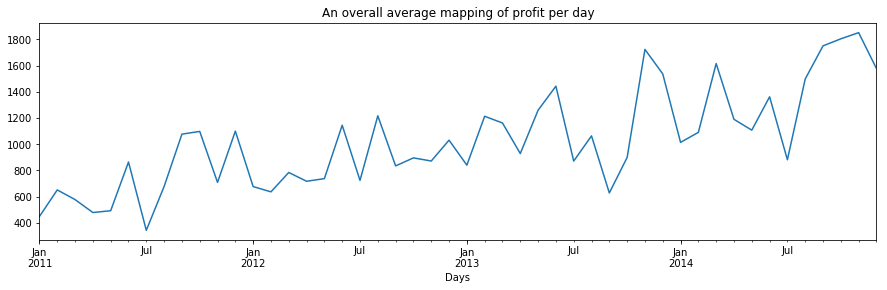

In [375]:
data3.resample("MS").mean().plot(figsize=(15,4), title  = "An overall average mapping of profit per day")

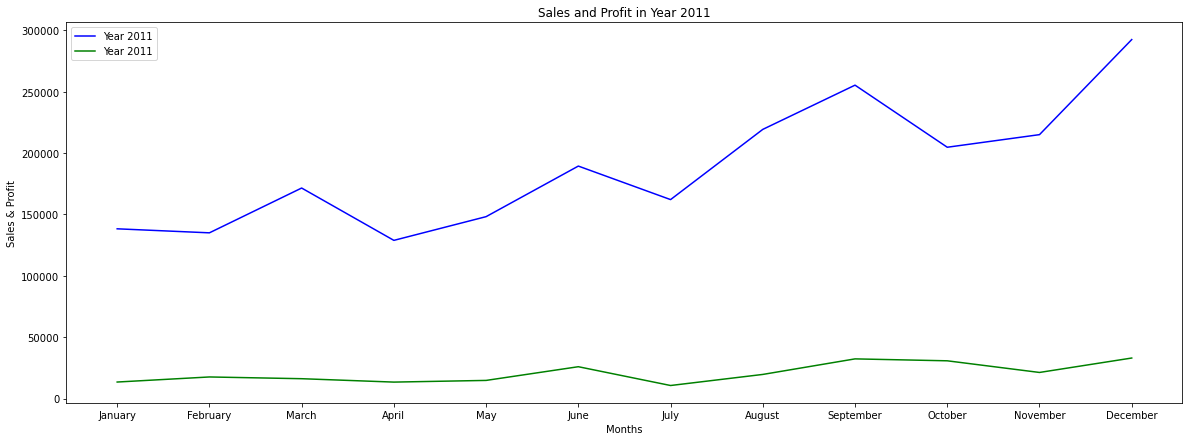

In [147]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
ax.set_title('Sales and Profit in Year 2011')
plt.plot(monthly_sales['Year 2011'],color='blue',label='Year 2011')
plt.plot(monthly_profit['Year 2011'],color='green',label='Year 2011')


ax.set_xlabel('Months')
ax.set_ylabel('Sales & Profit')
ax.legend(loc='best')
plt.show()

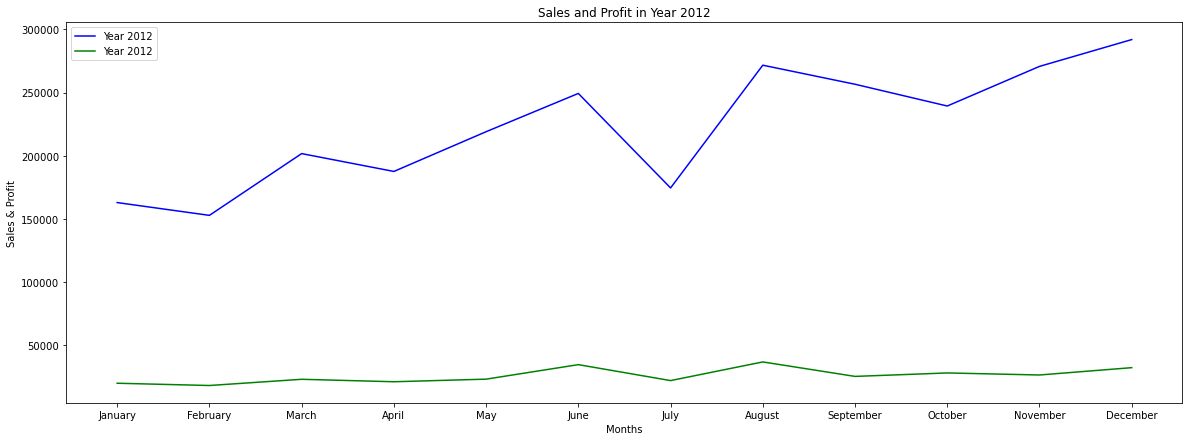

In [146]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
ax.set_title('Sales and Profit in Year 2012')
plt.plot(monthly_sales['Year 2012'],color='blue',label='Year 2012')
plt.plot(monthly_profit['Year 2012'],color='green',label='Year 2012')


ax.set_xlabel('Months')
ax.set_ylabel('Sales & Profit')
ax.legend(loc='best')
plt.show()

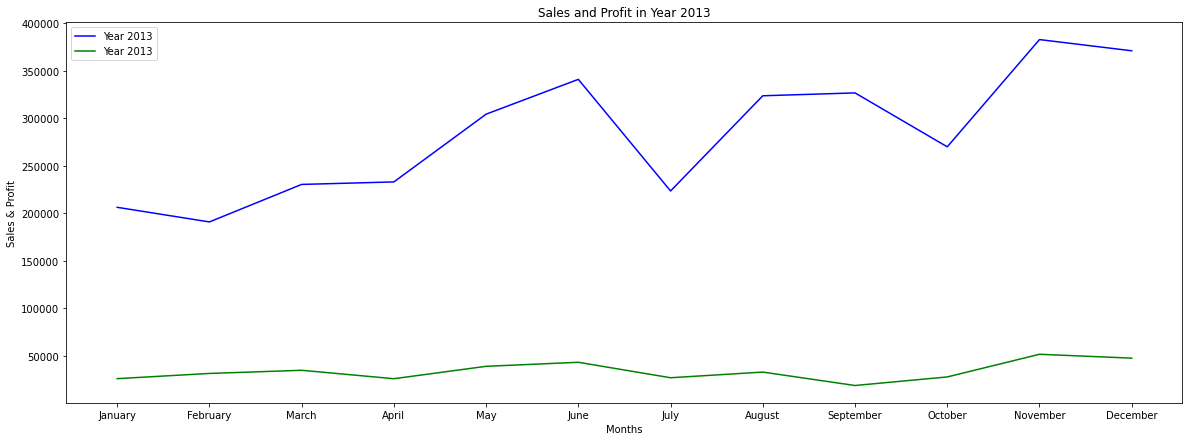

In [148]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
ax.set_title('Sales and Profit in Year 2013')
plt.plot(monthly_sales['Year 2013'],color='blue',label='Year 2013')
plt.plot(monthly_profit['Year 2013'],color='green',label='Year 2013')


ax.set_xlabel('Months')
ax.set_ylabel('Sales & Profit')
ax.legend(loc='best')
plt.show()

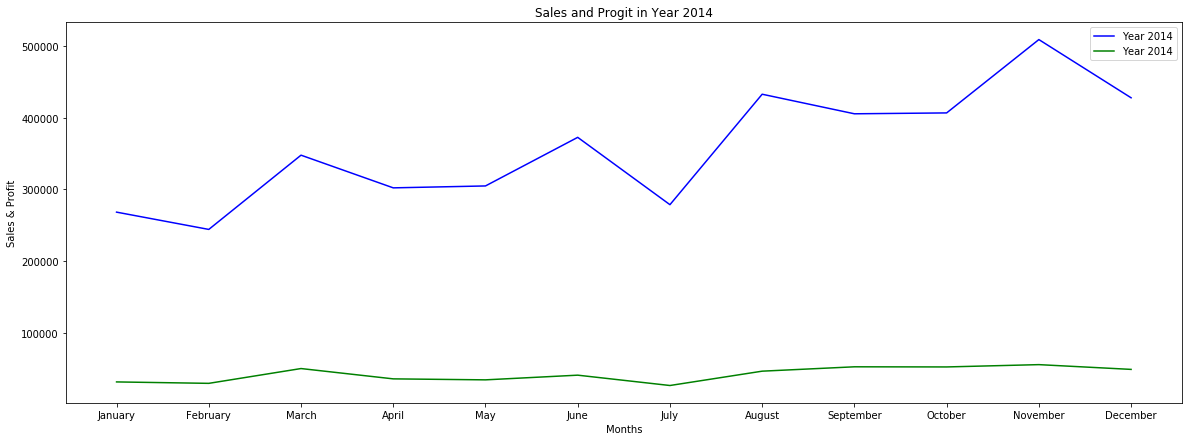

In [359]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)
ax.set_title('Sales and Progit in Year 2014')
plt.plot(monthly_sales['Year 2014'],color='blue',label='Year 2014')
plt.plot(monthly_profit['Year 2014'],color='green',label='Year 2014')


ax.set_xlabel('Months')
ax.set_ylabel('Sales & Profit')
ax.legend(loc='best')
plt.show()

In [114]:
profit_cal=data2.groupby(['Month']).sum()
ts = profit_cal['Sales']
ts

Month
2011-01-01    138241.30042
2011-02-01    134969.94086
2011-03-01    171455.59372
2011-04-01    128833.47034
2011-05-01    148146.72092
2011-06-01    189338.43966
2011-07-01    162034.69756
2011-08-01    219223.49524
2011-09-01    255237.89698
2011-10-01    204675.07846
2011-11-01    214934.29386
2011-12-01    292359.96752
2012-01-01    162800.89338
2012-02-01    152661.15144
2012-03-01    201608.72784
2012-04-01    187469.96192
2012-05-01    218960.16042
2012-06-01    249289.77172
2012-07-01    174394.02808
2012-08-01    271669.66086
2012-09-01    256567.85308
2012-10-01    239321.09904
2012-11-01    270723.05356
2012-12-01    291972.33306
2013-01-01    206459.19582
2013-02-01    191062.77216
2013-03-01    230547.79468
2013-04-01    233181.34844
2013-05-01    304509.96336
2013-06-01    341162.34370
2013-07-01    223642.65664
2013-08-01    323876.60716
2013-09-01    326897.27044
2013-10-01    270121.87570
2013-11-01    383039.21248
2013-12-01    371245.40880
2014-01-01    268265.5

In [115]:

register_matplotlib_converters()
result = adfuller(ts)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.04629202732491684
p-value: 0.9621970331293923
Critical Values:
	1%: -3.584828853223594
	5%: -2.9282991495198907
	10%: -2.6023438271604937


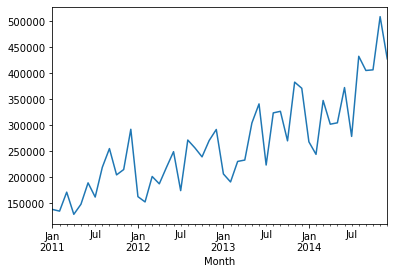

In [122]:
ts.plot()
plt.show()

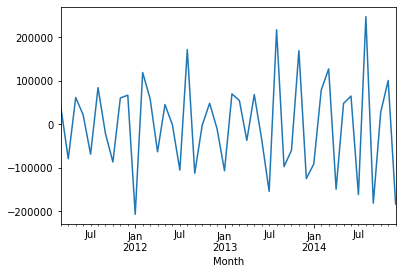

In [135]:
ts1 = ts -ts.shift(1)
ts1.dropna().plot()
ts1 = ts1.dropna()

In [136]:

register_matplotlib_converters()
result = adfuller(ts1)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -5.942238397022772
p-value: 2.2467316691442573e-07
Critical Values:
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756


C:\Users\yasir\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


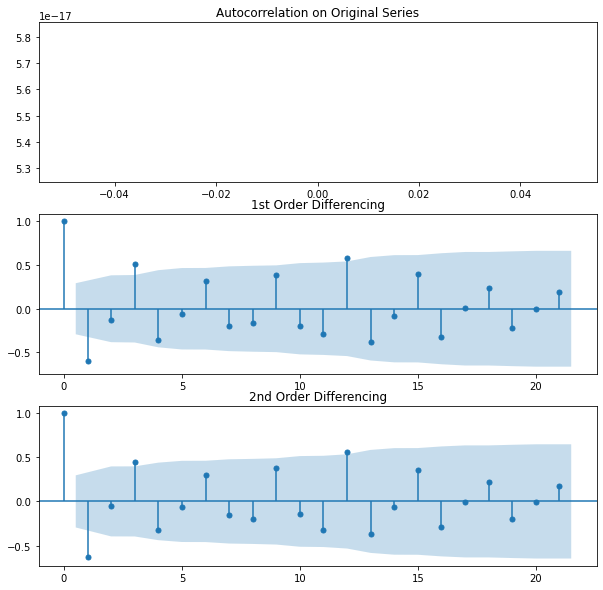

In [130]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(ts1, ax=ax1,lags=21,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(ts1.diff().dropna(), ax=ax2, lags=21,
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(ts1.diff().diff().dropna(), ax=ax3,lags=21, 
               title="2nd Order Differencing")

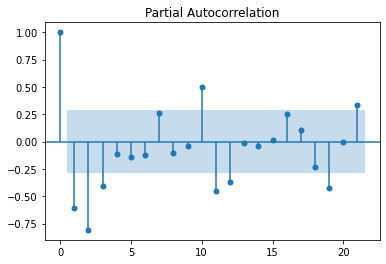

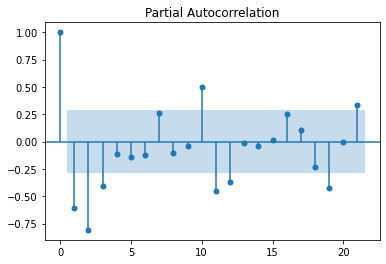

In [133]:
plot_pacf(ts1.diff().dropna(), lags=21)


C:\Users\yasir\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\yasir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

C:\Users\yasir\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


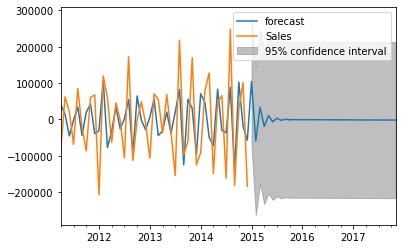

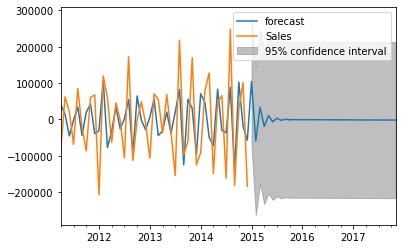

In [142]:

model_c = ARIMA(ts1, order=(1, 1, 1))
print(model_c)
results_c = model_c.fit()
print(results_c)
results_c.plot_predict(1, 80)

In [143]:
results_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   45
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -579.754
Method:                       css-mle   S.D. of innovations          90022.996
Date:                Sat, 26 Dec 2020   AIC                           1167.509
Time:                        20:04:09   BIC                           1174.735
Sample:                    04-01-2011   HQIC                          1170.203
                         - 12-01-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -52.1105    653.564     -0.080      0.936   -1333.073    1228.852
ar.L1.D.Sales    -0.5686      0.124     -4.580      0.000      -0.812      -0.325
ma.L1.D.Sales    -0.9999      0.056    -17.911      0.000      -1.109      -0.891
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7588           +0.0000j            1.7588            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [205]:
pred_uc_c = results_c.forecast(steps=30, exog=None, alpha=0.05)
pred_uc_c = results_c.forecast(steps=30, alpha=0.05)
forecast_c = pd.DataFrame(pred_uc_c[0])

std_error_c = pd.DataFrame(pred_uc_c[1])

interval_c = pd.DataFrame(pred_uc_c[2])

alll_c = pd.concat([forecast_c, std_error_c, interval_c], axis= 1, sort= False )
alll_c.columns = ['Forecasted Qty Sold', 'Std Error', 'Lower', 'Upper']
print(alll_c)
alll_c.to_csv('sales_c_data.csv')


    Forecasted Qty Sold      Std Error          Lower          Upper
0         104321.229030   90022.996404  -72120.601702  280763.059761
1         -59406.487719  103554.079862 -262368.754701  143555.779263
2          33604.511202  107566.735896 -177222.417088  244431.439492
3         -19361.668331  108831.366831 -232667.227707  193943.891045
4          10672.242612  109237.619309 -203429.556991  224774.042215
5          -6486.257560  109368.322200 -220844.230120  207871.715001
6           3188.028282  109410.719607 -211253.041671  217629.098236
7          -2394.342365  109424.322407 -216862.073316  212073.388586
8            697.957114  109428.776684 -213778.504058  215174.418286
9          -1142.010306  109430.184299 -215621.230353  213337.209740
10          -177.576359  109430.657831 -214657.724514  214302.571795
11          -807.676364  109430.800493 -215288.104130  213672.751401
12          -531.152034  109430.852620 -215011.681967  213949.377898
13          -770.118568  109430.86